In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
train1000100 = pd.read_csv("./HW1_dataset/train-1000-100.csv")

In [37]:
train50 = train1000100.head(50)
train100 = train1000100.head(100)
train150 = train1000100.head(150)

In [38]:
train50.to_csv("./HW1_dataset/train-50(1000)-100.csv", index=False)
train100.to_csv("./HW1_dataset/train-100(1000)-100.csv", index=False)
train150.to_csv("./HW1_dataset/train-150(1000)-100.csv", index=False)

In [39]:
train10010 = pd.read_csv("./HW1_dataset/train-100-10.csv")
train100100 = pd.read_csv("./HW1_dataset/train-100-100.csv")

In [40]:
test10010 = pd.read_csv("./HW1_dataset/test-100-10.csv")
test100100 = pd.read_csv("./HW1_dataset/test-100-100.csv")
test1000100 = pd.read_csv("./HW1_dataset/test-1000-100.csv")

In [41]:
def l2_regression(X, y, lamb):
    I = np.eye(X.shape[1])
    w = np.linalg.inv((X.T @ X) + (lamb * I)) @ X.T @ y
    return w

In [42]:
def find_mse(X, y, w):
    prediction = X @ w
    return np.mean((prediction - y)**2)

In [43]:
def cross_validate_lambda(X, y, lambdas, k=10):

    samples = len(X)
    indices = np.arange(samples)
    folds = np.array_split(indices, k)

    mean_cv_mse = []

    for lamb in lambdas:
        fold_scores = [] # mse for each fold 
        for i in range(k):
            validation_idx = folds[i]
            train_idx = np.hstack([folds[j] for j in range(k) if j != i])
            X_train_fold, X_validation_fold = X[train_idx], X[validation_idx]
            y_train_fold, y_validation_fold = y[train_idx], y[validation_idx]

            w = l2_regression(X_train_fold, y_train_fold, lamb)

            # MSE here is calculated by the validation fold
            mse = find_mse(X_validation_fold, y_validation_fold, w)
            fold_scores.append(mse)

        mean_cv_mse.append(np.mean(fold_scores))

    best_lambda = lambdas[np.argmin(mean_cv_mse)]

    return best_lambda, mean_cv_mse

In [44]:
def process_dataset(train_data, test_data):
    
    train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]
    
    X_train = train_data.drop(columns=["y"]).values
    y_train = train_data["y"].values

    X_test = test_data.drop(columns=["y"]).values
    y_test = test_data["y"].values

    lambdas = np.arange(0, 151)
    
    # returns the best lambda value after computing each lambda
    best_lambda, mean_cv_mse = cross_validate_lambda(X_train, y_train, lambdas)
    
    # final model with best lambda
    w_final = l2_regression(X_train, y_train, best_lambda)
    
    test_mse = find_mse(X_test, y_test, w_final)
    
    return best_lambda, mean_cv_mse, test_mse


In [45]:
def plot_cv_results(lambdas, mean_cv_mse, best_lambda, dataset_name):
    plt.figure(figsize=(5, 3))
    plt.plot(lambdas, mean_cv_mse, 'b-', label='Training CV MSE')
    plt.axvline(x=best_lambda, color='r', linestyle='--', 
                label=f'Best λ = {best_lambda}')
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Cross-Validation MSE')
    plt.title(f'{dataset_name}: Cross-Validation Results')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [46]:
datasets = [
    (train50, test1000100, "Train-50(1000)-100", "Test-1000-100"),
    (train100, test1000100, "Train-100(1000)-100", "Test-1000-100"), 
    (train150, test1000100, "Train-150(1000)-100", "Test-1000-100"),
    (train10010, test10010, "Train-100-10", "Test-100-10"),
    (train100100, test100100, "Train-100-100", "Test-100-100"),
    (train1000100, test1000100, "Train-1000-100", "Test-1000-100")
]

#### Results with plots for each training datasets:

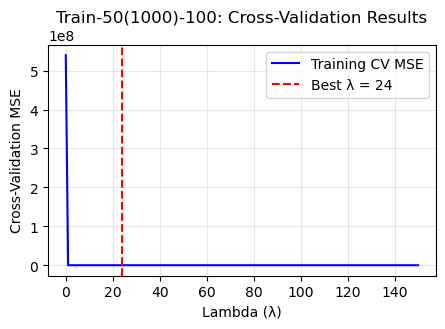

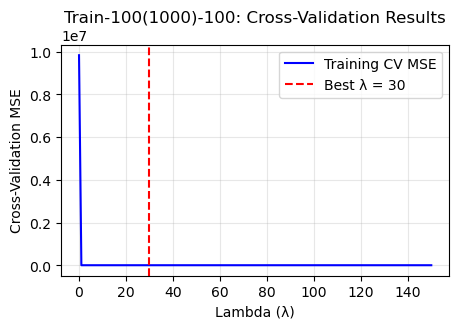

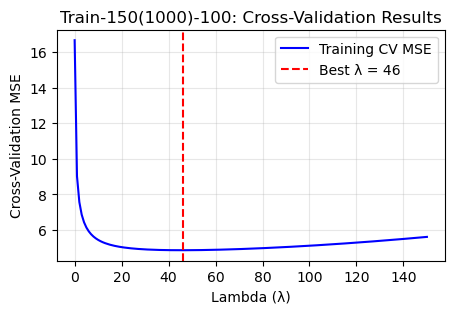

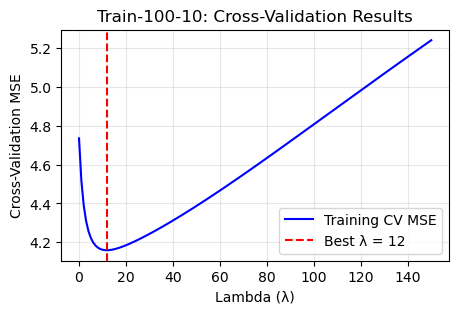

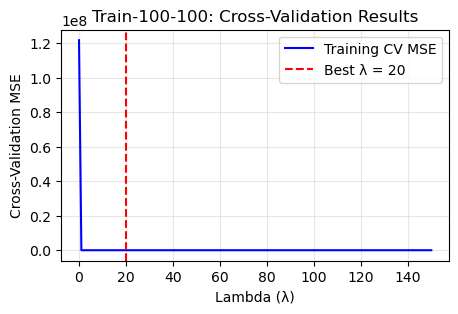

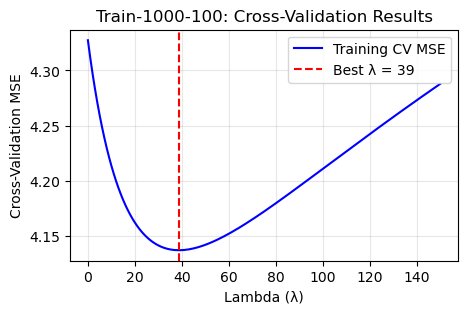

In [47]:
results = []
lambdas = np.arange(0, 151)
for train_data, test_data, train_name, test_name in datasets:
    best_lambda, cv_mse_list, test_mse = process_dataset(train_data, test_data)
    plot_cv_results(lambdas, cv_mse_list, best_lambda, train_name)
    results.append((train_name, best_lambda, test_mse))
    


In [48]:
for name, best_lambda, test_mse in results:
    print(f"{name} Best lambda: {best_lambda} with Test MSE: {test_mse:.2f}")


Train-50(1000)-100 Best lambda: 24 with Test MSE: 5.93
Train-100(1000)-100 Best lambda: 30 with Test MSE: 5.26
Train-150(1000)-100 Best lambda: 46 with Test MSE: 4.93
Train-100-10 Best lambda: 12 with Test MSE: 4.18
Train-100-100 Best lambda: 20 with Test MSE: 5.08
Train-1000-100 Best lambda: 39 with Test MSE: 4.32


#### a) Using CV technique, what is the best choice of λ value and the corresponding test set MSE for each of the six datasets?
    - Train-50(1000)-100 Best lambda: 24 with Test MSE: 5.93
    - Train-100(1000)-100 Best lambda: 30 with Test MSE: 5.26
    - Train-150(1000)-100 Best lambda: 46 with Test MSE: 4.93
    - Train-100-10 Best lambda: 12 with Test MSE: 4.18
    - Train-100-100 Best lambda: 20 with Test MSE: 5.08
    - Train-1000-100 Best lambda: 39 with Test MSE: 4.32

#### b) How do the values for λ and MSE obtained from CV compare to the choice of λ and MSE in question 1(a)?

##### Listing the CV best lambdas and the previous question's best lambdas below:
    -Train-50: 
        - With CV: Lambda: 24, Test MSE: 5.93
        - Without CV: Lambda: 8, Test MSE: 5.541

    -Train-100: 
        - With CV: Lambda: 30, Test MSE: 5.26
        - Without CV: Lambda: 19, Test MSE: 5.206

    -Train-150: 
        - With CV: Lambda: 46, Test MSE: 4.93
        - Without CV: Lambda: 23, Test MSE: 4.849

    -Train-100-10: 
        - With CV: Lambda: 12, Test MSE: 4.18
        - Without CV: Lambda: 8, Test MSE: 4.160

    -Train-100-100: 
        - With CV: Lambda: 20, Test MSE: 5.08
        - Without CV: Lambda: 22, Test MSE: 5.078

    -Train-1000-100: 
        - With CV: Lambda: 39, Test MSE: 4.32
        - Without CV: Lambda: 27, Test MSE: 4.316

    - For most datasets (Train-50, Train-100, Train-150, Train-100-10, and Train-1000-100) we noticed a higher value of lambda than the value of lambda without Cross validation. This implies that cross validation offers stronger regularization to avoid overfitting.
    
    - Additionally, the Test MSE values are comparably close, demonstrating the desired prediction quality of cross validation without referring to the test dataset to get the best labda value, unlike how it was done on Question 2.
    

### c) What are the drawbacks of CV?
    -Cross Validation has a high computational cost because models are computed for each fold instead of just training a model only once, as done on the previous question. This repeated training also results in a requirement of increased training time.
    -Cross validation may also cause variance in small datasets if the dataset is small. Because we cannot guarantee a well distributed folds every time, the CV scores (mean MSE scores) that vary or fluctuate making it harder to get a generalized model.